In [2]:
import numpy as np 
import pandas as pd 
diabets =pd.read_csv('diabetes.csv')

# Visualizamos los datos 
print(diabets.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#Tipo de datos y cantidad de nulos
print(diabets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
#Vemos si hay alguna fila duplicada
diabets[diabets.duplicated()].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [5]:
diabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

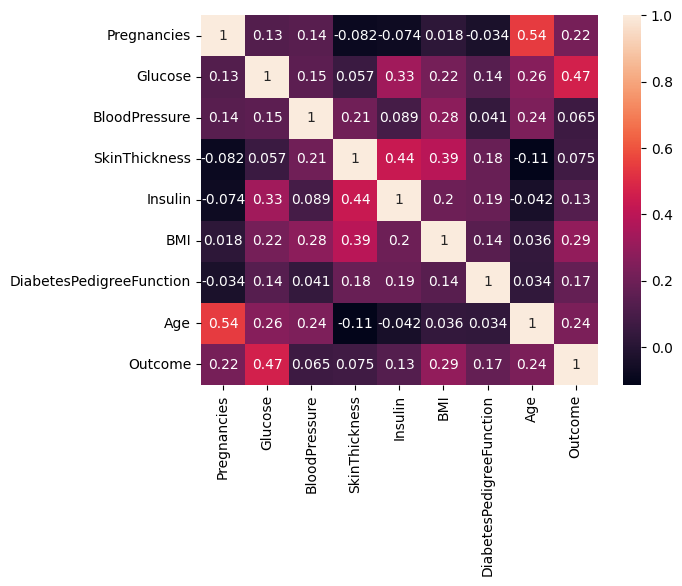

In [6]:
import seaborn as sns
sns.heatmap(diabets.corr(),annot =True)

In [7]:
corr_report = diabets.corr()['Outcome']
corr_report

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

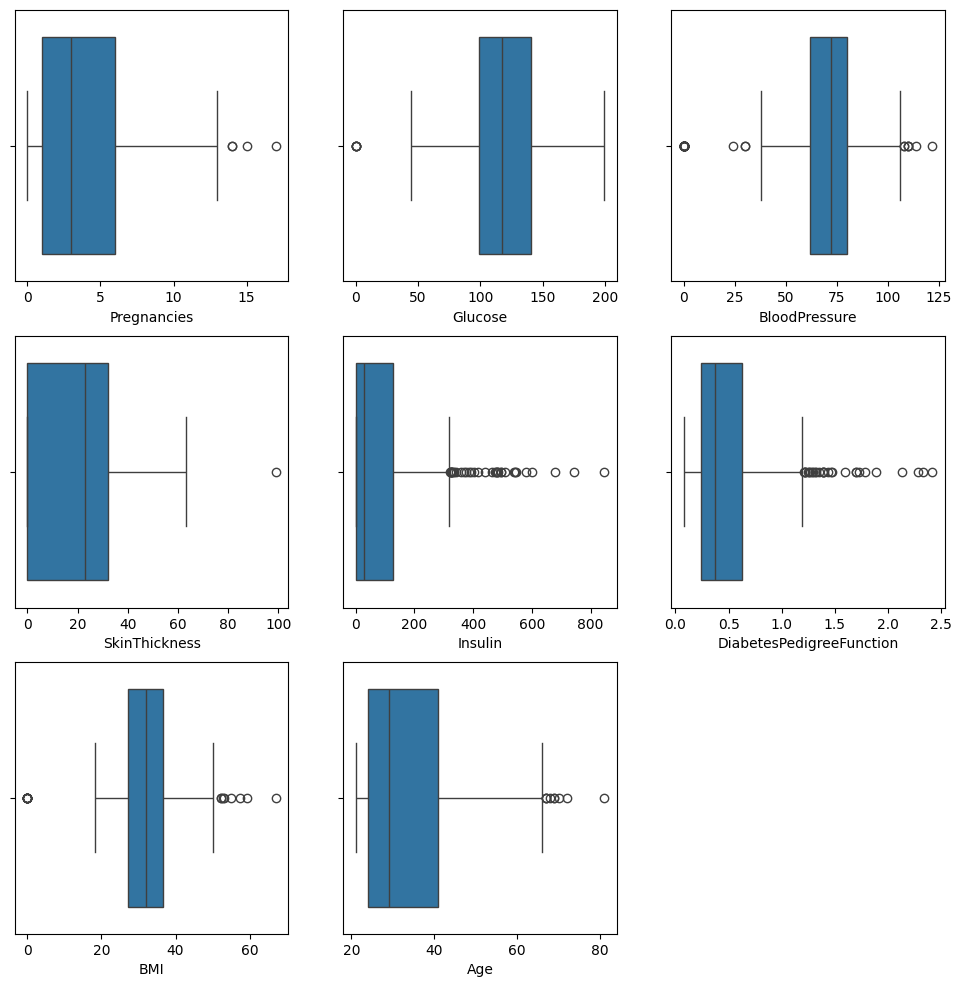

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','BMI','Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=col,data=diabets)
plt.show()

In [9]:
#Vemos si hay valores que son 0 
print((diabets['Glucose'] == 0).sum())
print((diabets['BloodPressure'] == 0).sum())
print((diabets['SkinThickness'] == 0).sum())
print((diabets['Insulin'] == 0).sum())
print((diabets['BMI'] == 0).sum())
print((diabets['DiabetesPedigreeFunction'] == 0).sum())
print((diabets['Age'] == 0).sum())

5
35
227
374
11
0
0


<Axes: xlabel='BMI', ylabel='Count'>

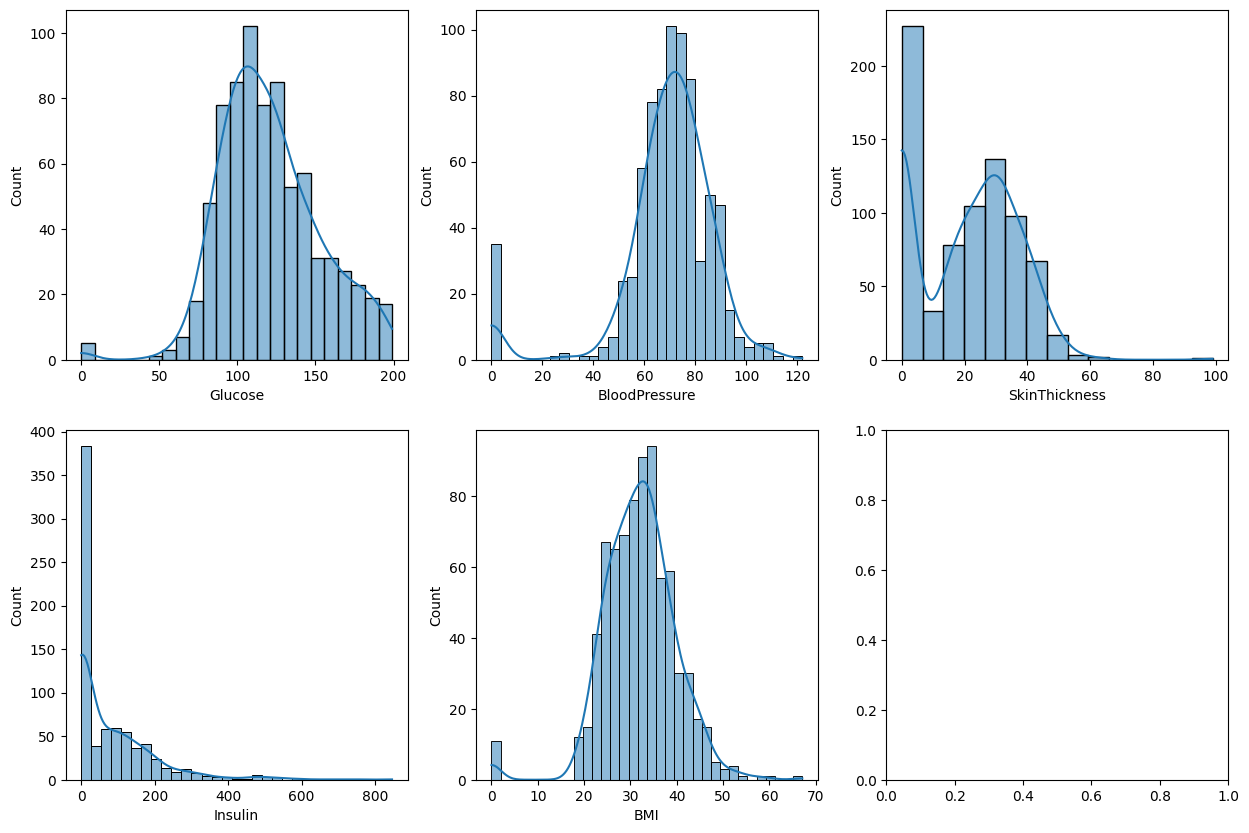

In [10]:
#checking for the data distribution type to identity impute method for missing values.
fig, axes = plt.subplots(2,3, figsize=(15, 10))

sns.histplot(diabets.Glucose, ax= axes[0,0], kde=True)
sns.histplot(diabets.BloodPressure,  ax= axes[0,1],kde=True)
sns.histplot(diabets.SkinThickness,  ax= axes[0,2], kde=True)
sns.histplot(diabets.Insulin,  ax= axes[1,0], kde=True)
sns.histplot(diabets.BMI,  ax= axes[1,1], kde=True)


In [11]:
#Since, Glucose and Blood Pressure has normal distribution we are using mean to impute missing values while median will be used for Insulin, BMI and SkinThickness as they have skewed distribution.**

diabets['Glucose'].replace(0, diabets['Glucose'].mean(), inplace=True) #Normal Distribution
diabets['BloodPressure'].replace(0, diabets['BloodPressure'].mean(), inplace=True) #Normal Distribution
diabets['Insulin'].replace(0, diabets['Insulin'].median(), inplace=True) #Skewed Distribution
diabets['BMI'].replace(0, diabets['BMI'].median(), inplace=True) #Skewed Distribution
diabets['SkinThickness'].replace(0, diabets['SkinThickness'].median(), inplace=True) #Skewed Distribution

C:\Users\serra\AppData\Local\Temp\ipykernel_37184\3619135367.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabets['Glucose'].replace(0, diabets['Glucose'].mean(), inplace=True) #Normal Distribution
C:\Users\serra\AppData\Local\Temp\ipykernel_37184\3619135367.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

<Axes: >

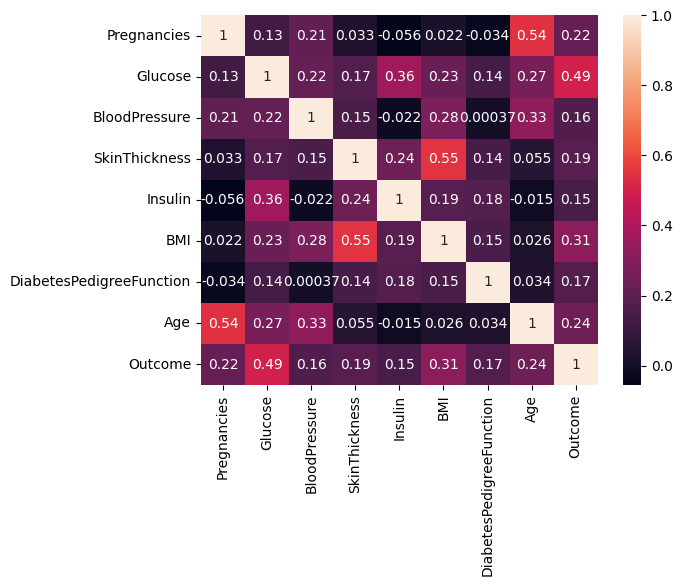

In [12]:
import seaborn as sns
sns.heatmap(diabets.corr(),annot =True)

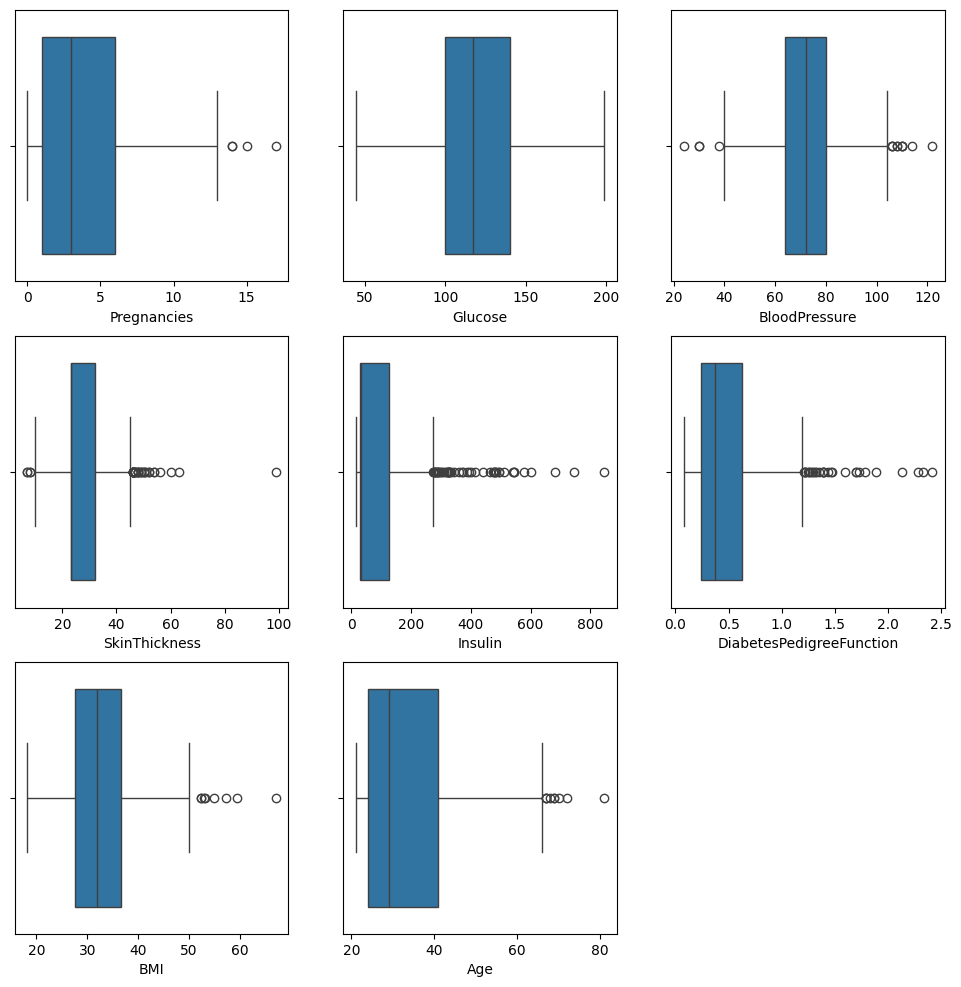

In [14]:

plt.figure(figsize=(12,12))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','BMI','Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=col,data=diabets)
plt.show()

In [36]:
import sklearn 
from sklearn.model_selection import train_test_split
Y = diabets.iloc[:,8]
X = diabets.iloc[:,:8]
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size =0.3 ,  random_state = 0)


In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

pipelines = [
    make_pipeline(StandardScaler(), LogisticRegression()),
    make_pipeline(StandardScaler(), KNeighborsClassifier()),
    make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    make_pipeline(StandardScaler(), RandomForestClassifier()),
    make_pipeline(StandardScaler(), GradientBoostingClassifier()),

]


for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
from sklearn.metrics import classification_report

algorithm_names = [pipeline.steps[-1][1].__class__.__name__ for pipeline in pipelines]
reports = []
for algorithm, pipeline in zip(algorithm_names, pipelines):
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred)
    reports.append((algorithm, report))
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    print(f"{algorithm} Metrics:")
    print(f"Accuracy Score: {accuracy}")
    print("Confusion Matrix:")
    print(confusion)
    print('-' * 50)

for algorithm, report in reports:
    print(f"{algorithm} Classification Report:")
    print(report)
    print('-' * 50)


LogisticRegression Metrics:
Accuracy Score: 0.7748917748917749
Confusion Matrix:
[[141  16]
 [ 36  38]]
--------------------------------------------------
KNeighborsClassifier Metrics:
Accuracy Score: 0.7748917748917749
Confusion Matrix:
[[140  17]
 [ 35  39]]
--------------------------------------------------
DecisionTreeClassifier Metrics:
Accuracy Score: 0.7229437229437229
Confusion Matrix:
[[124  33]
 [ 31  43]]
--------------------------------------------------
RandomForestClassifier Metrics:
Accuracy Score: 0.7619047619047619
Confusion Matrix:
[[138  19]
 [ 36  38]]
--------------------------------------------------
GradientBoostingClassifier Metrics:
Accuracy Score: 0.7705627705627706
Confusion Matrix:
[[136  21]
 [ 32  42]]
--------------------------------------------------
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       157
           1       0.70      0.51      0.59        74

 